<a href="https://colab.research.google.com/github/turgonboyev/Google_Colab_uchun/blob/main/Mushikni_taniydigan_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *
from ipywidgets import widgets

path = untar_data(URLs.PETS)/'images'

#Labellovchi f-ya
def is_cat(x):return x[0].isupper()

#datalarni yuklovchi
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

#O'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.165652,0.023777,0.989851,01:08


epoch,train_loss,valid_loss,accuracy,time
0,0.062169,0.010674,0.996617,01:17
1,0.023387,0.013854,0.995940,01:17


In [3]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi ? True
Javobning aniqlilik darajasi qanday ? : 1.000


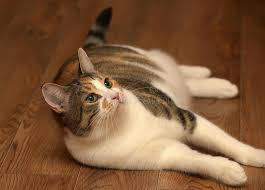

In [5]:
img = PILImage.create(upload.data[-1])
pred, _, prob = learn.predict(img)

print(f"Mushukmi ? {pred}")
print(f'Javobning aniqlilik darajasi qanday ? : {prob[1].item():.3f}')
img